In [158]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [157]:
class PositionalEncoding(nn.Module):

    def __init__(self, batch_size, d_model, dropout=0.2):
        super().__init__()

        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(batch_size, d_model)
        position = torch.arange(0, batch_size).unsqueeze(1)
        div_term = torch.pow(10000, torch.arange(0, d_model, 2)/d_model)
        
        pe[:, 0::2] = torch.sin(position / div_term)
        pe[:, 1::2] = torch.cos(position / div_term)

        self.register_buffer('pe', pe)
        print(pe.shape)
    
    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]

        return self.dropout(x)

torch.Size([100, 20])


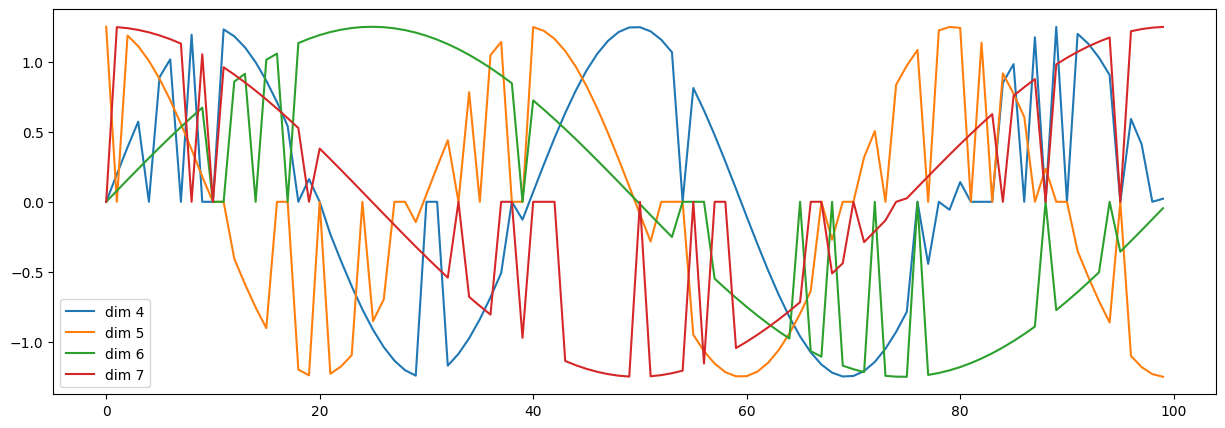

In [176]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(100, 20)
y = pe.forward(torch.zeros(1, 100, 20))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d"%p for p in [4,5,6,7]])
None